<a href="https://colab.research.google.com/github/Jay2163/mlproject/blob/main/CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets,layers,regularizers
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

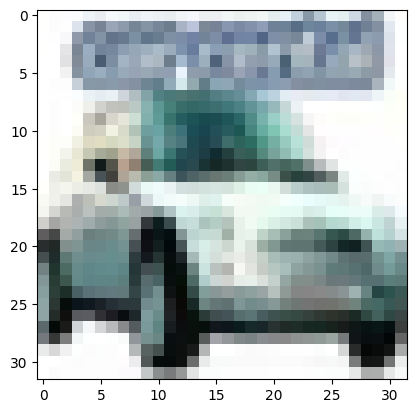

In [6]:
plt.imshow(x_train[40000])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

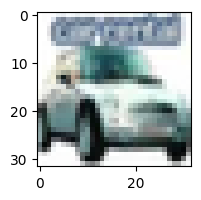

In [9]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[40000])

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[np.squeeze(Y[index])])

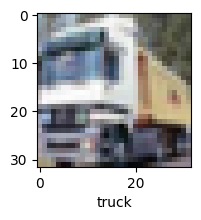

In [12]:
plot_sample(x_train,y_train,1)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [15]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [16]:
#Normalize Data
x_train = x_train/255
x_test = x_test/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [64]:
#convolutional model

cnn = tf.keras.models.Sequential([

      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(32,32,3)),
      layers.MaxPool2D((2,2)),
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'),
      layers.MaxPool2D((2,2)),
      layers.Flatten(),
      layers.Dense(170,activation='relu'),
      layers.Dense(80,activation='relu'),
      layers.Dense(10,activation='softmax')
])

In [65]:
#optimazation

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [66]:
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 2304)              0         
                                                                 
 dense_34 (Dense)            (None, 170)             

In [67]:
history = cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4555 - accuracy: 0.4723
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0781 - accuracy: 0.6183
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9276 - accuracy: 0.6757
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8256 - accuracy: 0.7114
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7369 - accuracy: 0.7424
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6584 - accuracy: 0.7694
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5905 - accuracy: 0.7938
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5194 - accuracy: 0.8161
Epoch 9/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4567 - accuracy: 0.8384
Epoch 10/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.400

In [72]:
history1 = cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9677


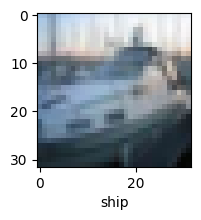

In [74]:
plot_sample(x_test,y_test,2)

In [75]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.4192266e-07, 2.8415498e-06, 2.0384284e-04, 9.0826249e-01,
        1.5768318e-02, 2.2268514e-03, 7.3529117e-02, 5.1601587e-06,
        9.3202863e-07, 9.5403179e-09],
       [1.2706223e-06, 2.3022330e-06, 2.2710478e-13, 2.7232437e-15,
        4.2796302e-20, 1.5293237e-12, 1.8041585e-18, 2.3410193e-22,
        9.9999642e-01, 4.3293106e-08],
       [6.9390554e-03, 4.4264738e-03, 1.2576630e-04, 5.4010737e-04,
        1.5446953e-05, 1.0150973e-06, 2.7356132e-06, 3.2848794e-07,
        9.8376775e-01, 4.1812756e-03],
       [8.3175212e-01, 3.8780930e-11, 1.6816595e-01, 2.1608885e-08,
        7.7128774e-05, 1.7140665e-07, 7.8754675e-17, 1.3035062e-10,
        4.5697006e-06, 4.4636402e-11],
       [5.6233958e-15, 1.8230386e-16, 5.1584273e-08, 6.5857638e-04,
        2.7008671e-03, 8.6403009e-09, 9.9664044e-01, 4.4900177e-12,
        6.6081781e-13, 9.1229280e-17]], dtype=float32)

In [76]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [78]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

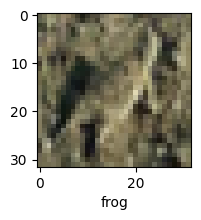

In [93]:
plot_sample(x_test,y_test,7999)

In [94]:
classes[y_classes[7999]]

'frog'